In [305]:
# Cameron Schultz 
# ckschult@usc.edu
# Github: ckschultz

# I would like to use 1 late day, please (Due: 11/12, Submitted: 11/13)

In [149]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score




# 1) Multi-class and Multi-Label Classification Using Support Vector Machines
# A) 

In [197]:
fp = '../data/Frogs_MFCCs.csv'

df = pd.read_csv(fp)
df = df.drop('RecordID', axis=1)
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [201]:
traindf, testdf = train_test_split(df, test_size=0.3, random_state=42)


# B ii) 

In [172]:
traindf_x= traindf.drop(['Species', 'Genus', 'Family'], axis=1)
testdf_x = testdf.drop(['Species', 'Genus', 'Family'], axis=1)


In [173]:
traindf_x

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.438532,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.108483,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.073050,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.404813,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.132244,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.378497,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.228140,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.047610,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656


## Family SVM

In [11]:
low_params = []
high_params = []

for i in range(-4, 0):
    low_params.append(10**(i))
    
for i in range(0, 4):
    high_params.append(10**(i))

print(low_params)
print(high_params)
# print([low_params, high_params])

# param_range_1 = [0.001, 0.1, 1, 100, 1000]

[0.0001, 0.001, 0.01, 0.1]
[1, 10, 100, 1000]


## Tuning for Best Parameters: Round 1

### Family

In [12]:
fam_svc = OneVsRestClassifier(SVC(kernel='rbf'))

params_low = {
    'estimator__C': low_params,
    'estimator__gamma': low_params,
    'estimator__decision_function_shape': ['ovr']
} 

params_high = {
    'estimator__C': high_params,
    'estimator__gamma': high_params,
    'estimator__decision_function_shape': ['ovr']
} 


tune_model = GridSearchCV(fam_svc, param_grid=params_low, cv=10, n_jobs=5).fit(traindf_x, traindf['Family'])
print("Family (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(fam_svc, param_grid=params_high, cv=10, n_jobs=5).fit(traindf_x, traindf['Family'])
print("Family (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Family (Low Parameters):
0.8643815677364385
{'estimator__C': 0.1, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 0.1}
Family (High Parameters):
0.9920575751838177
{'estimator__C': 100, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 1}


## Genus

In [14]:
svc = OneVsRestClassifier(SVC(kernel='rbf'))

tune_model = GridSearchCV(svc, param_grid=params_low, cv=10, n_jobs=5).fit(traindf_x, traindf['Genus'])
print("Genus (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(svc, param_grid=params_high, cv=10, n_jobs=5).fit(traindf_x, traindf['Genus'])
print("Genus (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Genus (Low Parameters):
0.8574260784499353
{'estimator__C': 0.1, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 0.1}
Genus (High Parameters):
0.990070292530531
{'estimator__C': 10, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 1}


## Species

In [15]:
tune_model = GridSearchCV(svc, param_grid=params_low, cv=10, n_jobs=5).fit(traindf_x, traindf['Species'])
print("Species (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(svc, param_grid=params_high, cv=10, n_jobs=5).fit(traindf_x, traindf['Species'])
print("Species (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Species (Low Parameters):
0.8584197197765787
{'estimator__C': 0.1, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 0.1}
Species (High Parameters):
0.9898706964561835
{'estimator__C': 10, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 1}


## Tuning for Best Parameters: Round 2

In [64]:
# HEURISTIC: range from (best low value - ~50% previous range) - (best high value + ~50% of next range)
fam_params = {
    'estimator__C': np.logspace(0.05, 2.5, 15), 
    'estimator__gamma': np.linspace(0.05, 5, 15), 
    'estimator__decision_function_shape': ['ovr']
}

gen_params = {
    'estimator__C': np.logspace(0.05, 2, 15), 
    'estimator__gamma': np.linspace(0.05, 5, 15), 
    'estimator__decision_function_shape': ['ovr']
}

spec_params = {
    'estimator__C': np.logspace(0.05, 2, 15), 
    'estimator__gamma': np.linspace(0.05, 5, 15), 
    'estimator__decision_function_shape': ['ovr']
}

# print(spec_params)


## Best Parameters (Weight of SVM Penalty (C) and Width of Gaussian Kernel (gamma):

In [66]:
svc = OneVsRestClassifier(SVC(kernel='rbf'))

# FAMILY 
tune_model = GridSearchCV(svc, param_grid=fam_params, cv=10, n_jobs=5).fit(traindf_x, traindf['Family'])
print("Family Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
f_c = tune_model.best_params_['estimator__C']
f_g = tune_model.best_params_['estimator__gamma']


# GENUS
tune_model = GridSearchCV(svc, param_grid=gen_params, cv=10, n_jobs=5).fit(traindf_x, traindf['Genus'])
print("Genus Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
g_c = tune_model.best_params_['estimator__C']
g_g = tune_model.best_params_['estimator__gamma']



# SPECIES
tune_model = GridSearchCV(svc, param_grid=spec_params, cv=10, n_jobs=5).fit(traindf_x, traindf['Species'])
print("Species Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
s_c = tune_model.best_params_['estimator__C']
s_g = tune_model.best_params_['estimator__gamma']


Family Best Parameters:
Score 0.9940432800025245
{'estimator__C': 3.758374042884442, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 3.585714285714286}
Genus Best Parameters:
Score 0.9920556028905929
{'estimator__C': 5.577358635768914, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 3.9392857142857145}
Species Best Parameters:
Score 0.9918571901921801
{'estimator__C': 7.68624610039774, 'estimator__decision_function_shape': 'ovr', 'estimator__gamma': 2.8785714285714286}


## Retrain Models with Optimal Parameters, Report Model Score 

## Family

In [191]:
svc = OneVsRestClassifier(SVC(kernel='rbf',
                              C=f_c,
                              gamma=f_g)).fit(traindf_x, traindf['Family'])
pred_train = svc.predict(traindf_x)
pred_test = svc.predict(testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Family'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Family'], pred_test))
og_fam = pred_test

Train Score:
Hamming Loss: 0.00019857029388403494

Test Score:
Hamming Loss: 0.006484483557202408


## Genus

In [192]:
svc = OneVsRestClassifier(SVC(kernel='rbf',
                              C=g_c,
                              gamma=g_g)).fit(traindf_x, traindf['Genus'])
pred_train = svc.predict(traindf_x)
pred_test = svc.predict(testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Genus'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Genus'], pred_test))
og_gen = pred_test

Train Score:
Hamming Loss: 0.0

Test Score:
Hamming Loss: 0.009263547938860583


## Species

In [194]:
svc = OneVsRestClassifier(SVC(kernel='rbf',
                              C=s_c,
                              gamma=s_g)).fit(traindf_x, traindf['Species'])
pred_train = svc.predict(traindf_x)
pred_test = svc.predict(testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Species'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Species'], pred_test))
og_spec = pred_test

Train Score:
Hamming Loss: 0.00019857029388403494

Test Score:
Hamming Loss: 0.010189902732746642


# Overall Model Score (Exact Match & Hamming Loss) 

In [225]:
# Exact match: all 3 predictions from all 3 models must match test data exactly.
accuracy = 0
for i in range(len(og_spec)):
    if (og_fam[i] == list(testdf['Family'])[i]) and (og_gen[i] == list(testdf['Genus'])[i]) and (og_spec[i] == list(testdf['Species'])[i]):
        accuracy += 1
print("Test Data:")
print("Exact Match:", str(accuracy/len(spec_predictions)))
print("Hamming Loss:", str((0.006484483557202408 + 0.009263547938860583 + 0.010189902732746642)/3))


Test Data:
Exact Match: 0.9874942102825383
Hamming Loss: 0.008645978076269878


# B iii) Repeat with Linear Kernel
## Family

In [75]:
linear_svc = LinearSVC(penalty="l1", random_state=42, multi_class = 'ovr', dual=False, max_iter=5000)
scaler = StandardScaler().fit(traindf_x)
scaled_traindf_x = scaler.transform(traindf_x)


params_low = {
    'C': low_params,
} 

params_high = {
    'C': high_params,
} 

tune_model = GridSearchCV(linear_svc, param_grid=params_low, cv=10).fit(scaled_traindf_x, traindf['Family'])
print("Family (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(linear_svc, param_grid=params_high, cv=10).fit(scaled_traindf_x, traindf['Family'])
print("Family (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Family (Low Parameters):
0.938247499132191
{'C': 0.1}
Family (High Parameters):
0.9406288459717882
{'C': 1}


## Genus

In [92]:
linear_svc = LinearSVC(penalty="l1", random_state=42, multi_class = 'ovr', dual=False, max_iter=10000)

linear_params_high = {'C':[1, 10, 100]}

tune_model = GridSearchCV(linear_svc, param_grid=params_low, cv=10).fit(scaled_traindf_x, traindf['Genus'])
print("Genus (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(linear_svc, param_grid=linear_params_high, cv=10).fit(scaled_traindf_x, traindf['Genus'])
print("Genus (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Genus (Low Parameters):
0.9426141563318501
{'C': 0.1}


/Users/cameronschultz/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/cameronschultz/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Genus (High Parameters):
0.9527422764997319
{'C': 10}


## Species

In [94]:
tune_model = GridSearchCV(linear_svc, param_grid=params_low, cv=10).fit(scaled_traindf_x, traindf['Species'])
print("Species (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(linear_svc, param_grid=linear_params_high, cv=10).fit(scaled_traindf_x, traindf['Species'])
print("Species (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Species (Low Parameters):
0.9499585818422795
{'C': 0.1}


/Users/cameronschultz/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/cameronschultz/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Species (High Parameters):
0.9602847202499291
{'C': 10}


## Refitting Model with Best Parameters (C) 

In [112]:
scaler = StandardScaler().fit(traindf_x)
scaled_testdf_x = scaler.transform(testdf_x)


In [106]:
fam_c = {'C': np.logspace(0, 1, 20)}
gen_c = {'C': np.logspace(0, 1.5, 20)}
spec_c = {'C': np.logspace(0, 1.5, 20)}

In [108]:
linear_svc = LinearSVC(penalty="l1", random_state=42, multi_class = 'ovr', dual=False, max_iter=10000)

# FAMILY 
tune_model = GridSearchCV(linear_svc, param_grid=fam_c, cv=10, n_jobs=5).fit(scaled_traindf_x, traindf['Family'])
print("Family Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
lin_f_c = tune_model.best_params_['C']

# GENUS
tune_model = GridSearchCV(linear_svc, param_grid=gen_c, cv=10, n_jobs=5).fit(scaled_traindf_x, traindf['Genus'])
print("Genus Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
lin_g_c = tune_model.best_params_['C']

# SPECIES
tune_model = GridSearchCV(linear_svc, param_grid=spec_c, cv=10, n_jobs=5).fit(scaled_traindf_x, traindf['Species'])
print("Species Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
lin_s_c = tune_model.best_params_['C']

Family Best Parameters:
Score 0.940827258670201
{'C': 1.2742749857031337}
Genus Best Parameters:
Score 0.9527422764997319
{'C': 8.858667904100825}
Species Best Parameters:
Score 0.9604839218656316
{'C': 1.7252105499420405}


## Retrain Models with Optimal Parameters, Report Model Score 

## Family

In [187]:
linear_svc = LinearSVC(penalty="l1",
                       random_state=42,
                       multi_class = 'ovr',
                       dual=False,
                       max_iter=10000,
                       C=lin_f_c).fit(scaled_traindf_x, traindf['Family'])

pred_train = linear_svc.predict(scaled_traindf_x)
pred_test = linear_svc.predict(scaled_testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Family'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Family'], pred_test))

lin_pre = pred_test

Train Score:
Hamming Loss: 0.057585385226370134

Test Score:
Hamming Loss: 0.07132931912922649


## Genus

In [188]:
linear_svc = LinearSVC(penalty="l1",
                       random_state=42,
                       multi_class = 'ovr',
                       dual=False,
                       max_iter=10000,
                       C=lin_g_c).fit(scaled_traindf_x, traindf['Genus'])

pred_train = linear_svc.predict(scaled_traindf_x)
pred_test = linear_svc.predict(scaled_testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Genus'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Genus'], pred_test))

lin_gen = pred_test

Train Score:
Hamming Loss: 0.043685464654487687

Test Score:
Hamming Loss: 0.058360352014821676


## Species

In [189]:
linear_svc = LinearSVC(penalty="l1",
                       random_state=42,
                       multi_class = 'ovr',
                       dual=False,
                       max_iter=10000,
                       C=lin_s_c).fit(scaled_traindf_x, traindf['Species'])

pred_train = linear_svc.predict(scaled_traindf_x)
pred_test = linear_svc.predict(scaled_testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Species'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Species'], pred_test))

lin_spec = pred_test

Train Score:
Hamming Loss: 0.0363383637807784

Test Score:
Hamming Loss: 0.041222788327929596


# Overall Model Score (Exact Match & Hamming Loss)

In [226]:
# Exact match: all 3 predictions from 3 models must match test data exactly.
accuracy = 0
for i in range(len(spec_predictions)):
    if (lin_pre[i] == list(testdf['Family'])[i]) and (lin_gen[i] == list(testdf['Genus'])[i]) and (lin_spec[i] == list(testdf['Species'])[i]):
        accuracy += 1
print("Test Data:")
print("Exact Match:", str(accuracy/len(spec_predictions)))
print("Hamming Loss:", str((0.07132931912922649 + 0.058360352014821676 + 0.041222788327929596)/3))


Test Data:
Exact Match: 0.9133858267716536
Hamming Loss: 0.05697081982399258


# B iii) Linear SVC with SMOTE

In [128]:
linear_svc = LinearSVC(penalty="l1", random_state=42, multi_class = 'ovr', dual=False, max_iter=5000)
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', linear_svc]])

smote_params_low = {
    'classifier__C': low_params,
} 

smote_params_high = {
    'classifier__C': high_params,
} 

## CV Round 1
## Family

In [129]:
tune_model = GridSearchCV(estimator=pipeline, param_grid=smote_params_low, cv=10).fit(scaled_traindf_x, traindf['Family'])
print("Family (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(estimator=pipeline, param_grid=smote_params_high, cv=10).fit(scaled_traindf_x, traindf['Family'])
print("Family (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Family (Low Parameters):
0.9197824955031715
{'classifier__C': 0.1}
Family (High Parameters):
0.9213697970904731
{'classifier__C': 10}


## Genus

In [130]:
tune_model = GridSearchCV(estimator=pipeline, param_grid=smote_params_low, cv=10).fit(scaled_traindf_x, traindf['Genus'])
print("Genus (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(estimator=pipeline, param_grid=smote_params_high, cv=10).fit(scaled_traindf_x, traindf['Genus'])
print("Genus (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Genus (Low Parameters):
0.9106440720754836
{'classifier__C': 0.1}
Genus (High Parameters):
0.9128301618858281
{'classifier__C': 100}


## Species

In [134]:
linear_svc = LinearSVC(penalty="l1", random_state=42, multi_class = 'ovr', dual=False, max_iter=5000)
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', linear_svc]])


tune_model = GridSearchCV(estimator=pipeline, param_grid=smote_params_low, cv=10).fit(scaled_traindf_x, traindf['Species'])
print("Species (Low Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)

tune_model = GridSearchCV(estimator=pipeline, param_grid=smote_params_high, cv=10).fit(scaled_traindf_x, traindf['Species'])
print("Species (High Parameters):")
print(tune_model.best_score_)
print(tune_model.best_params_)


Species (Low Parameters):
0.9557180725172773
{'classifier__C': 0.1}
Species (High Parameters):
0.9569081542491086
{'classifier__C': 1}


## CV Round 2

In [141]:
smote_fam_c = {'C': np.logspace(0, 1.5, 20)}
smote_gen_c = {'C': np.logspace(0, 2.5, 20)}
smote_spec_c = {'C': np.logspace(0, 1, 20)}
# print(smote_fam_c)
# print(smote_spec_c)

In [142]:
linear_svc = LinearSVC(penalty="l1", random_state=42, multi_class = 'ovr', dual=False, max_iter=5000)
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', linear_svc]])

# FAMILY 
tune_model = GridSearchCV(linear_svc, param_grid=smote_fam_c, cv=10, n_jobs=5).fit(scaled_traindf_x, traindf['Family'])
print("Family Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
smote_f_c = tune_model.best_params_['C']

# GENUS
tune_model = GridSearchCV(linear_svc, param_grid=smote_gen_c, cv=10, n_jobs=5).fit(scaled_traindf_x, traindf['Genus'])
print("Genus Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
smote_g_c = tune_model.best_params_['C']

# SPECIES
tune_model = GridSearchCV(linear_svc, param_grid=smote_spec_c, cv=10, n_jobs=5).fit(scaled_traindf_x, traindf['Species'])
print("Species Best Parameters:")
print("Score", tune_model.best_score_)
print(tune_model.best_params_)
smote_s_c = tune_model.best_params_['C']

Family Best Parameters:
Score 0.940827258670201
{'C': 1.4384498882876628}
Genus Best Parameters:
Score 0.9527422764997319
{'C': 8.33782223471789}
Species Best Parameters:
Score 0.9604839218656316
{'C': 1.8329807108324359}


## Retrain Models with Optimal Parameters, Report Model Score 
## Family

In [203]:
linear_svc = LinearSVC(penalty="l1",
                       random_state=42,
                       multi_class = 'ovr',
                       dual=False,
                       max_iter=5000,
                       C=smote_f_c).fit(scaled_traindf_x, traindf['Family'])

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', linear_svc]])

pred_train = linear_svc.predict(scaled_traindf_x)
pred_test = linear_svc.predict(scaled_testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Family'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Family'], pred_test))

fam_predictions = pred_test


Train Score:
Hamming Loss: 0.057585385226370134

Test Score:
Hamming Loss: 0.07132931912922649


## Genus

In [204]:
linear_svc = LinearSVC(penalty="l1",
                       random_state=42,
                       multi_class = 'ovr',
                       dual=False,
                       max_iter=5000,
                       C=smote_g_c).fit(scaled_traindf_x, traindf['Genus'])

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', linear_svc]])

pred_train = linear_svc.predict(scaled_traindf_x)
pred_test = linear_svc.predict(scaled_testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Genus'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Genus'], pred_test))

gen_predictions = pred_test


Train Score:
Hamming Loss: 0.043685464654487687

Test Score:
Hamming Loss: 0.058360352014821676


## Species

In [205]:
linear_svc = LinearSVC(penalty="l1",
                       random_state=42,
                       multi_class = 'ovr',
                       dual=False,
                       max_iter=5000,
                       C=smote_s_c).fit(scaled_traindf_x, traindf['Species'])

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', linear_svc]])

pred_train = linear_svc.predict(scaled_traindf_x)
pred_test = linear_svc.predict(scaled_testdf_x)

print("Train Score:")
print("Hamming Loss:", hamming_loss(traindf['Species'], pred_train))

print("\nTest Score:")
print("Hamming Loss:", hamming_loss(testdf['Species'], pred_test))

spec_predictions = pred_test


Train Score:
Hamming Loss: 0.03653693407466243

Test Score:
Hamming Loss: 0.041222788327929596


# Overall Model Score (Exact Match & Hamming Loss)

In [224]:
accuracy = 0
for i in range(len(spec_predictions)):
    if (fam_predictions[i] == list(testdf['Family'])[i]) and (gen_predictions[i] == list(testdf['Genus'])[i]) and (spec_predictions[i] == list(testdf['Species'])[i]):
        accuracy += 1
print("Test Data:")
print("Exact Match:", str(accuracy/len(spec_predictions)))
print("Hamming Loss:", str(1-(0.9286706808707735 + 0.9416396479851783 + 0.9587772116720704)/3))



Test Data:
Exact Match: 0.9133858267716536
Hamming Loss: 0.05697081982399255


# 2) K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation

In [227]:
# FULL DATASET
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [228]:
k = []
for i in range(1, 51):
    k.append(i)

In [229]:
flabels, funiques = pd.factorize(df['Family'])
glabels, guniques = pd.factorize(df['Genus'])
slabels, suniques = pd.factorize(df['Species'])

df['Family'] = flabels
df['Genus'] = glabels
df['Species'] = slabels
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0,0,0
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0,0,0
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0,0,0
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0,0,0
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,2,7,9
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,2,7,9
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,2,7,9
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,2,7,9


In [303]:
avg_hamming_loss = []
avg_hamming_distance = []
avg_hamming_score = []
for m in range(50):
    avg_hamming_loss.append(0)
    avg_hamming_distance.append(0)
    avg_hamming_score.append(0)


for j in range(0, 50):
    print("Iterations remaining:", 49-j)
    silscores = []
    bestk = 0
    bestscore = 0
    for clusters in k:
        kmeans = KMeans(n_clusters=clusters).fit(df)
        predictions = kmeans.predict(df)
        if clusters==1:
            sil_score = 0
        else:
            sil_score = silhouette_score(df, predictions)
        if sil_score > bestscore:
            bestscore = sil_score
            bestk = clusters
#             print("Score:", sil_score)
            maj_fam = []
            maj_gen = []
            maj_spec = []
        #     for i in range(0, clusters):
            for i in range(clusters):
                maj_fam.append(df[kmeans.labels_==i]['Family'].mode()[0])
                maj_gen.append(df[kmeans.labels_==i]['Genus'].mode()[0])
                maj_spec.append(df[kmeans.labels_==i]['Species'].mode()[0])
            ham_accuracy = 0
            ham_dist = 0
            for i in range(clusters):
    #             print(maj_fam[i])
                inc = df[(kmeans.labels_==i) & (df['Family'] != maj_fam[i])].shape[0] + df[(kmeans.labels_==i) & (df['Genus'] != maj_gen[i])].shape[0] + df[(kmeans.labels_==i) & (df['Species'] != maj_spec[i])].shape[0]
                ham_accuracy += inc
    #             incorrect += df[(kmeans.labels_==i) & (df['Family'] != maj_fam[i])].shape[0] + df[(kmeans.labels_==i) & (df['Genus'] != maj_gen[i])].shape[0] + df[(kmeans.labels_==i) & (df['Species'] != maj_spec[i])].shape[0]
    #             ham_dist += incorrect
            avg_hamming_loss[j] = (ham_accuracy/3/df.shape[0])
            avg_hamming_distance[j] = (ham_accuracy*3/df.shape[0])
            avg_hamming_score[j] = (1-(ham_accuracy/3/df.shape[0]))    


    
    
    
    

Iterations remaining: 49
Iterations remaining: 48
Iterations remaining: 47
Iterations remaining: 46
Iterations remaining: 45
Iterations remaining: 44
Iterations remaining: 43
Iterations remaining: 42
Iterations remaining: 41
Iterations remaining: 40
Iterations remaining: 39
Iterations remaining: 38
Iterations remaining: 37
Iterations remaining: 36
Iterations remaining: 35
Iterations remaining: 34
Iterations remaining: 33
Iterations remaining: 32
Iterations remaining: 31
Iterations remaining: 30
Iterations remaining: 29
Iterations remaining: 28
Iterations remaining: 27
Iterations remaining: 26
Iterations remaining: 25
Iterations remaining: 24
Iterations remaining: 23
Iterations remaining: 22
Iterations remaining: 21
Iterations remaining: 20
Iterations remaining: 19
Iterations remaining: 18
Iterations remaining: 17
Iterations remaining: 16
Iterations remaining: 15
Iterations remaining: 14
Iterations remaining: 13
Iterations remaining: 12
Iterations remaining: 11
Iterations remaining: 10


# Monte-Carlo Simulation Score

In [304]:
print("Average Hamming Score:", sum(avg_hamming_score)/len(avg_hamming_score))
print("Average Hamming Loss:", sum(avg_hamming_loss)/len(avg_hamming_loss))
print("Average Hamming Distance:", sum(avg_hamming_distance)/len(avg_hamming_distance))

Average Hamming Score: 0.9986768589298124
Average Hamming Loss: 0.0013231410701876303
Average Hamming Distance: 0.011908269631688673


# ISLR 12.6.2

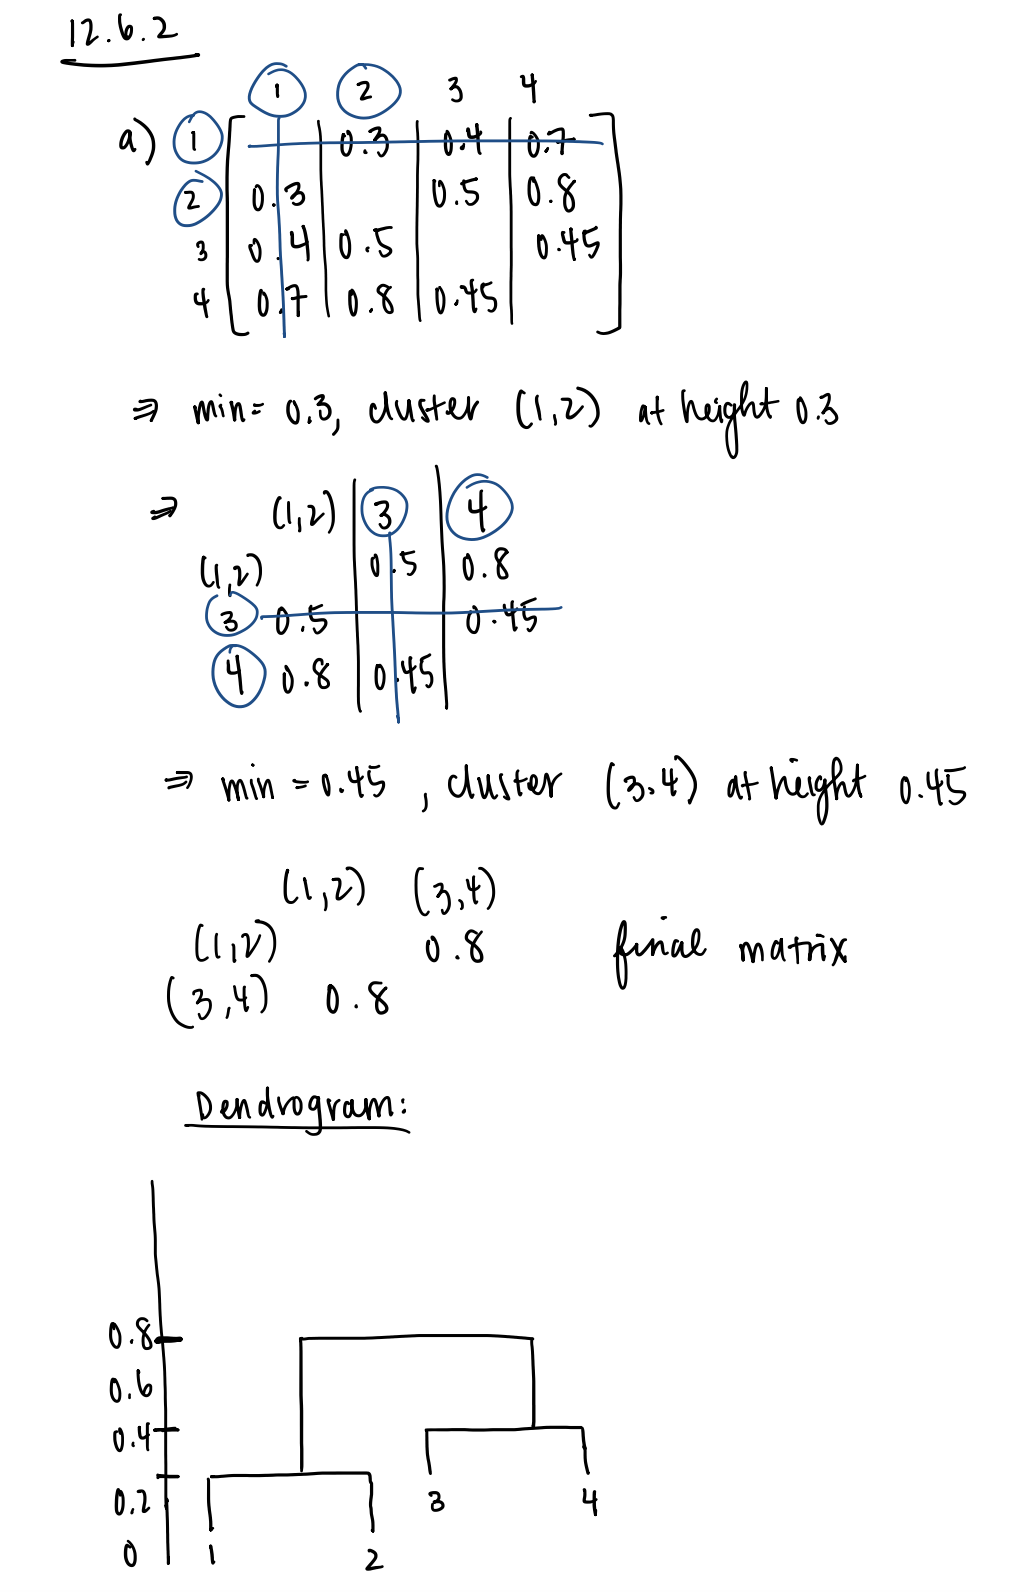

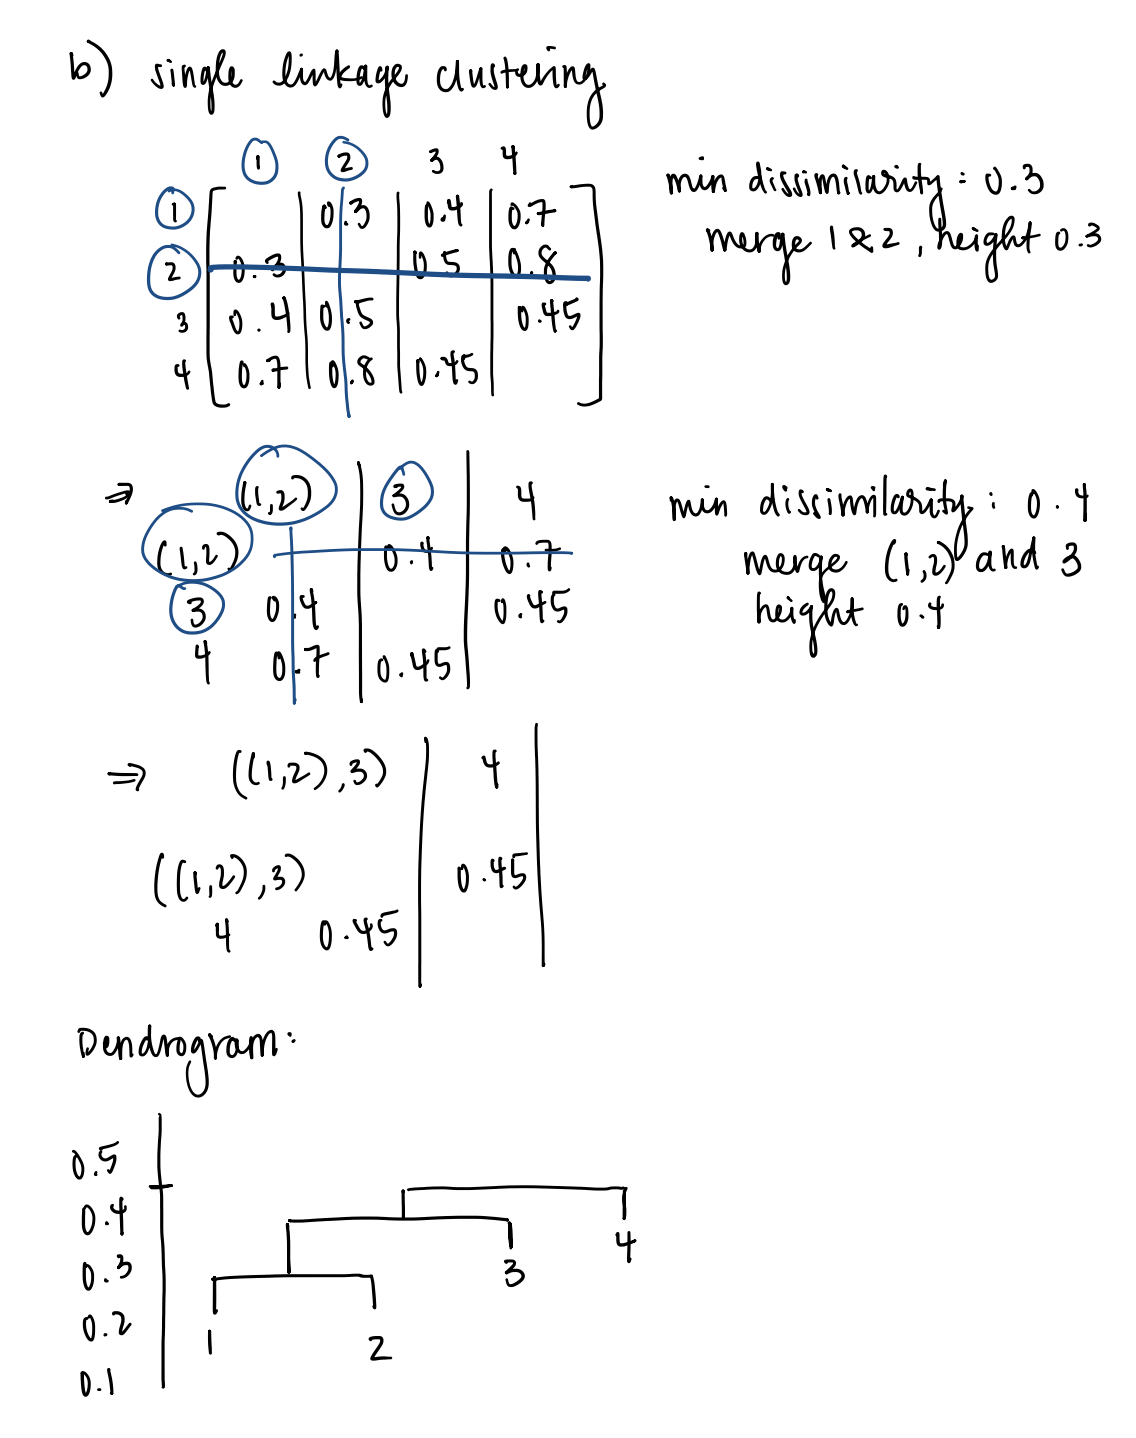

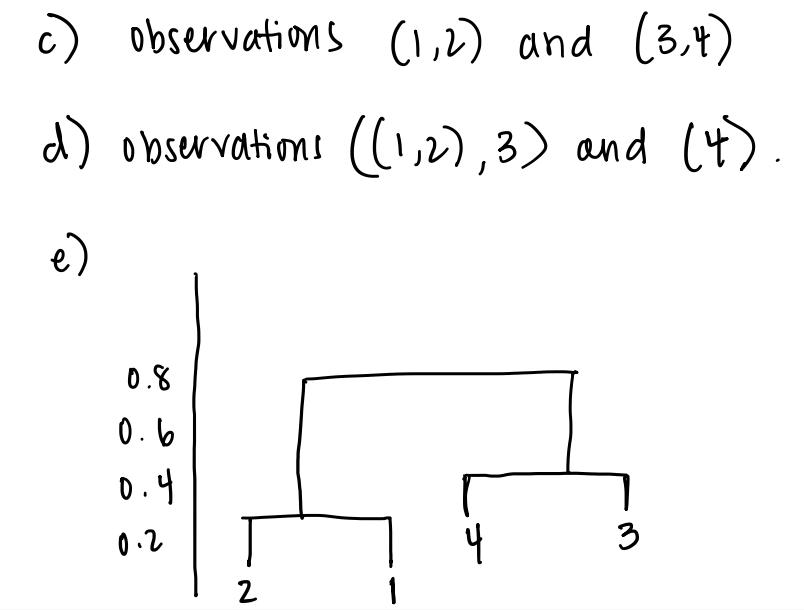